In [93]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings("ignore")

In [94]:
df = pd.read_csv('bcd.csv')

In [95]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [96]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [97]:
df=df.drop(columns=['Unnamed: 32','id'])

In [98]:
# shuffle the data because data in series data cleaning
df = df.sample(frac=1)

df.iloc[:10]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
55,B,11.52,18.75,73.34,409.0,0.09524,0.05473,0.030360,0.02278,0.1920,...,12.84,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036
14,M,13.73,22.61,93.60,578.3,0.11310,0.22930,0.212800,0.08025,0.2069,...,15.03,32.01,108.80,697.7,0.16510,0.77250,0.69430,0.22080,0.3596,0.14310
265,M,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.136700,0.08646,0.1769,...,32.49,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218
31,M,11.84,18.70,77.93,440.6,0.11090,0.15160,0.121800,0.05182,0.2301,...,16.82,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020
179,B,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.01330,0.1466,...,13.63,16.15,86.70,570.7,0.11620,0.05445,0.02758,0.03990,0.1783,0.07319
378,B,13.66,15.15,88.27,580.6,0.08268,0.07548,0.042490,0.02471,0.1792,...,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
149,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.01329,0.1473,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
49,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
542,B,14.74,25.42,94.70,668.6,0.08275,0.07214,0.041050,0.03027,0.1840,...,16.51,32.29,107.40,826.4,0.10600,0.13760,0.16110,0.10950,0.2722,0.06956
516,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.09451,0.1860,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863


In [99]:
# no of rows and columns
df.shape

(569, 31)

In [100]:
# Checking the data types
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [101]:
# Except 'diagnosis' all the columns are numeric
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [102]:
# check for null values in dataset
df.isnull().values.any()

False

In [103]:
# Count class labels visualization
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

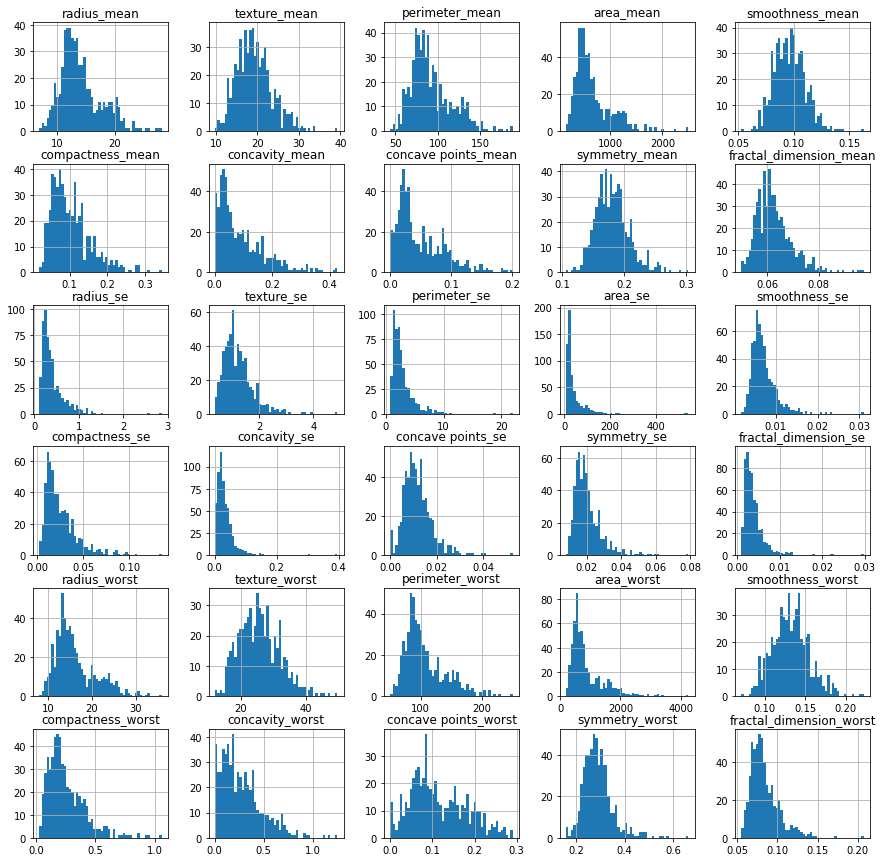

In [104]:
# Data visualization to create histogram
df.hist(bins=50, figsize=(15, 15))
plt.show()

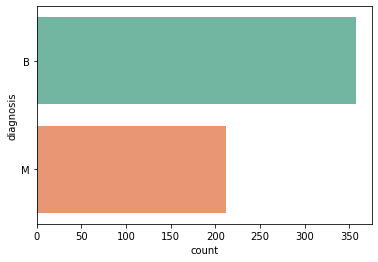

In [105]:
# Count each label
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

diagnosis
B    357
M    212
dtype: int64


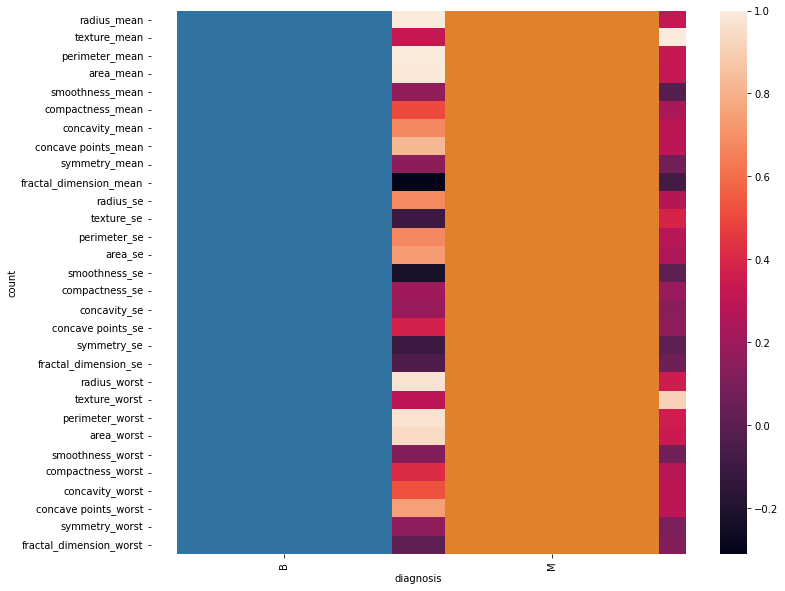

In [106]:
# Finding correlation 
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)
print(df.groupby('diagnosis').size())
sns.countplot(df['diagnosis'],label="Count")
plt.show()

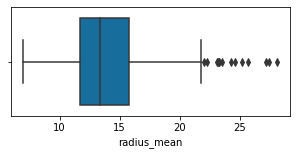

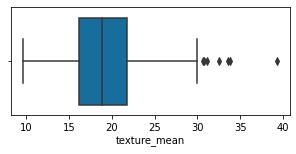

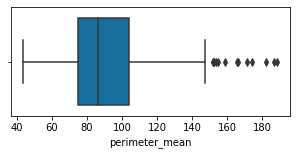

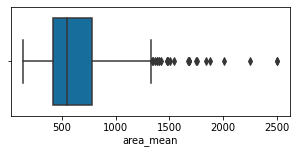

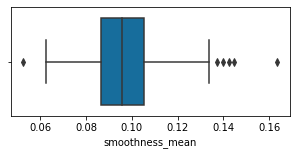

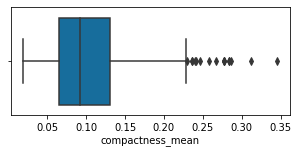

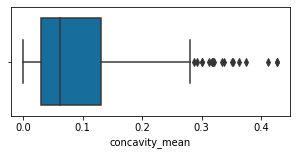

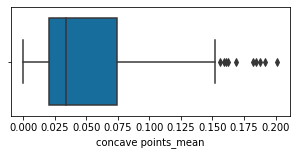

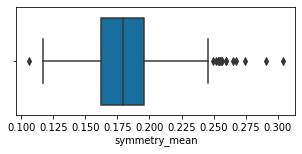

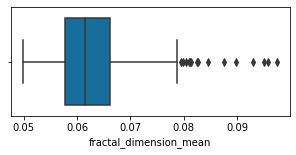

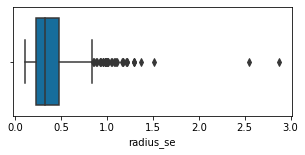

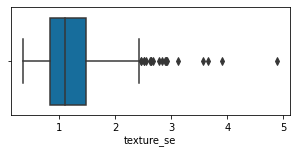

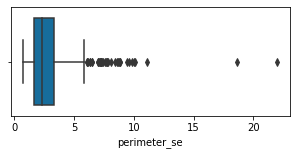

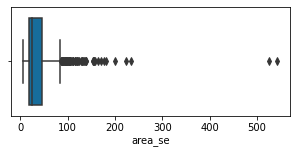

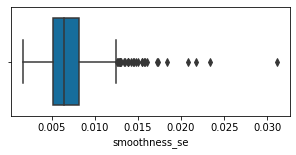

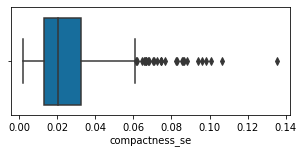

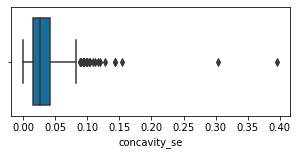

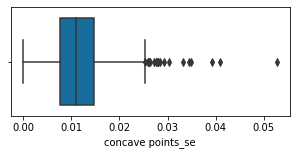

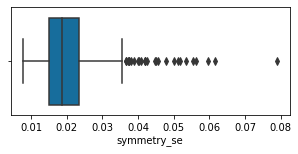

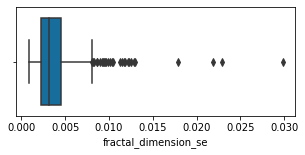

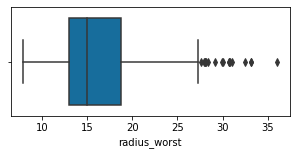

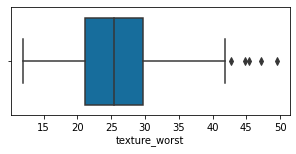

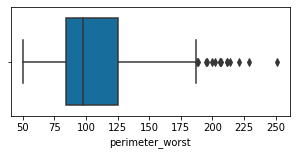

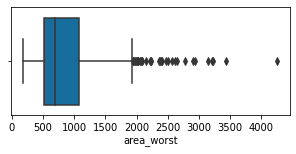

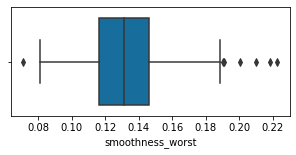

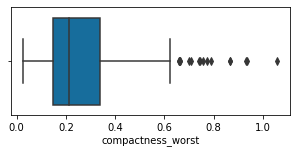

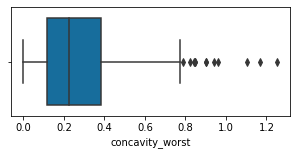

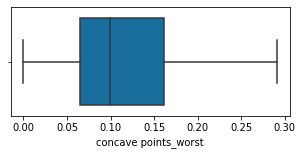

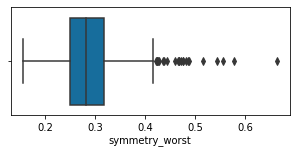

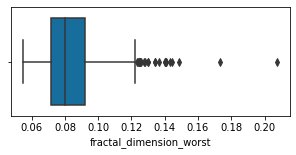

In [107]:
# box plot to check outlier in each category 
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(df)

In [108]:
#preprocessing after this step new df is created
# Quartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
inter_quartile_range = Q3 - Q1

In [109]:
# quartiles and interquartile range

df_out = df[~((df < (Q1 - (1.5 * inter_quartile_range))) | (df > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
df.shape, df_out.shape

((569, 31), (398, 31))

In [110]:
#data preprocessing
# Separate labels and features
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']
# Convert the M to 1 and B to 0
label = LabelEncoder()
y = label.fit_transform(y)
y[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [111]:
#data splitting
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 30), (120, 30), (278,), (120,))

In [112]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]

def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)


In [113]:
# custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N )

In [114]:
# cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

In [115]:
def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [116]:
# acc list and roc list stores the output of each model
acc = []
roc = []

In [117]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


LogisticRegression()
****************************************************
Training Set Accuracy :  0.9460431654676259
Accuracy 0.9583333333333334 ROC 0.95


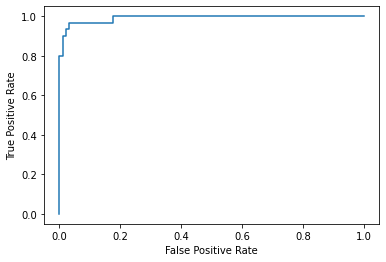

True Positive:  [6 7 7 6 6 4 6 6 4 4]
True Negative:  [20 19 21 20 21 21 21 21 20 20]
False Negative:  [1 0 0 1 1 3 1 1 2 2]
False Positive:  [1 2 0 1 0 0 0 0 1 1]
Accuracy:  [1 1 1 1 1 1 1 1 1 1]



SVC(gamma='auto', kernel='linear', probability=True)
****************************************************
Training Set Accuracy :  0.9568345323741008
Accuracy 0.9833333333333333 ROC 0.9777777777777779


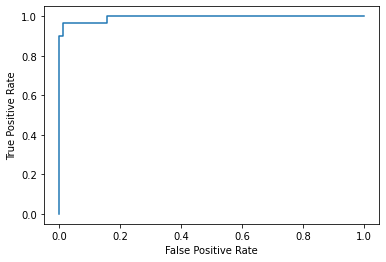

True Positive:  [6 6 7 6 6 4 6 6 4 4]
True Negative:  [20 20 21 20 21 21 21 21 21 20]
False Negative:  [1 1 0 1 1 3 1 1 2 2]
False Positive:  [1 1 0 1 0 0 0 0 0 1]
Accuracy:  [1 1 1 1 1 1 1 1 1 1]



KNeighborsClassifier(n_jobs=-1, n_neighbors=9)
****************************************************
Training Set Accuracy :  0.9424460431654677
Accuracy 0.925 ROC 0.8611111111111113


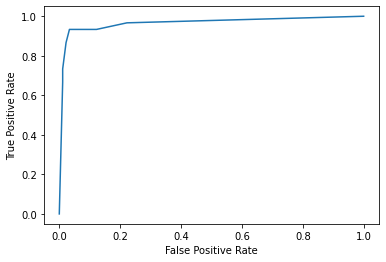

True Positive:  [6 7 6 5 6 4 6 6 4 3]
True Negative:  [21 18 21 20 21 21 21 20 20 21]
False Negative:  [1 0 1 2 1 3 1 1 2 3]
False Positive:  [0 3 0 1 0 0 0 1 1 0]
Accuracy:  [1 1 1 1 1 1 1 1 1 1]



GaussianNB()
****************************************************
Training Set Accuracy :  0.9388489208633094
Accuracy 0.9333333333333333 ROC 0.9333333333333333


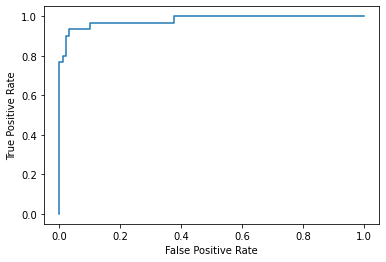

True Positive:  [6 7 7 7 7 6 7 7 6 4]
True Negative:  [19 19 21 19 20 19 21 20 20 19]
False Negative:  [1 0 0 0 0 1 0 0 0 2]
False Positive:  [2 2 0 2 1 2 0 1 1 2]
Accuracy:  [1 1 1 1 1 1 1 1 1 1]



RandomForestClassifier(max_depth=10, n_estimators=20)
****************************************************
Training Set Accuracy :  1.0
Accuracy 0.9833333333333333 ROC 0.9666666666666667


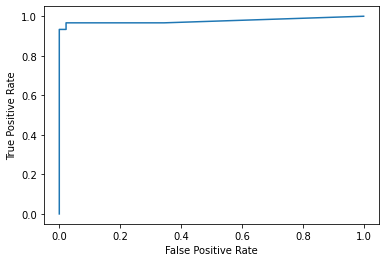

True Positive:  [6 7 7 7 7 3 6 6 6 3]
True Negative:  [20 19 20 20 21 19 21 20 21 21]
False Negative:  [1 0 0 0 0 4 1 1 0 3]
False Positive:  [1 2 1 1 0 2 0 1 0 0]
Accuracy:  [1 1 1 1 1 1 1 1 1 1]



DecisionTreeClassifier()
****************************************************
Training Set Accuracy :  1.0
Accuracy 0.9416666666666667 ROC 0.9277777777777778


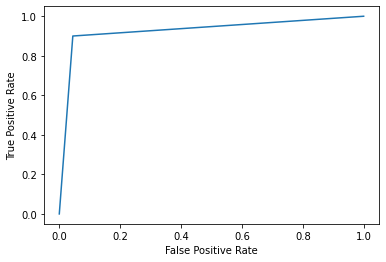

True Positive:  [6 7 7 6 6 4 6 6 5 2]
True Negative:  [20 18 21 19 21 18 21 18 21 20]
False Negative:  [1 0 0 1 1 3 1 1 1 4]
False Positive:  [1 3 0 2 0 3 0 3 0 1]
Accuracy:  [1 1 1 1 1 1 1 1 1 1]





In [118]:
# Logistic Regression
LR = LogisticRegression()
# Support Vector Machine
SVM = SVC(gamma='auto', kernel='linear', probability=True)
# KNN
KNN = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
# Naive Bayes
NB = GaussianNB()
# Random Forest
RF = RandomForestClassifier(n_estimators=20, max_depth=10)
# Decision Tree
DTC = DecisionTreeClassifier()
models=[LR,SVM,KNN,NB,RF,DTC]
for model in models:
  print(model)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  ac = accuracy_score(y_test, y_pred)
  acc.append(ac)
  ac_train = accuracy_score(y_train, y_pred_train)
  rc = roc_auc_score(y_test, y_pred)
  roc.append(rc)
  
  print("****************************************************")
  print("Training Set Accuracy : ", ac_train)
  print("Accuracy {0} ROC {1}".format(ac, rc))
  from sklearn import metrics
  import matplotlib.pyplot as plt
  #define metrics
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  #create ROC curve
  plt.plot(fpr,tpr)
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  # cross validation
  result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
  print_result(result)
  print("\n\n")

Text(0.5, 0, 'Algortihms')

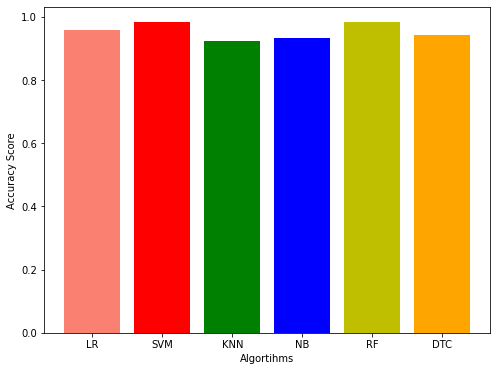

In [119]:
# accuracy score
plt.figure(figsize=(8, 6))
plt.bar(['LR','SVM','KNN','NB','RF','DTC'], acc, color=['salmon', 'r', 'g', 'b','y', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

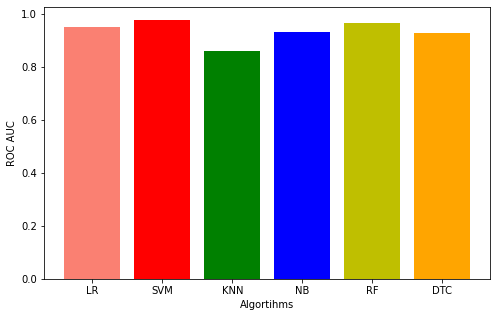

In [120]:
# roc-auc
plt.figure(figsize=(8, 5))
plt.bar(['LR','SVM','KNN','NB','RF','DTC'], roc,color=['salmon', 'r', 'g', 'b','y', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()

In [121]:
import numpy as np
a=[7.76,24.54,47.92,181,0.05263,0.04362,0,0,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0,0,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0,0,0.2871,0.07039]
a=np.expand_dims(a,0)
print(SVM.predict(a))

[0]


In [122]:
a=[20.6,29.33,140.1,1265,0.1178,0.277,0.3514,0.152,0.2397,0.07016,0.726,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.74,39.42,184.6,1821,0.165,0.8681,0.9387,0.265,0.4087,0.124]
a=np.expand_dims(a,0)
print(SVM.predict(a))

[1]
